In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/world_bank_development_indicators.csv")

df["date"] = pd.to_datetime(df["date"], errors='coerce')
df["year"] = df["date"].dt.year

df_year = df[df["year"] == 2019]

# Life expectancy (Normal)
life = df_year["life_expectancy_at_birth"].dropna()

mme_mu = life.mean()
mme_sigma2 = (life**2).mean() - (life.mean())**2

# Bernoulli (Internet > 60%)
internet = df_year["individuals_using_internet%"].dropna()
indicator = (internet > 60).astype(int)
mme_p = indicator.mean()

# Exponential (CO2)
co2 = df_year["CO2_emisions"].dropna()
mme_lambda = 1 / co2.mean()

print("MME mu (Normal) =", mme_mu)
print("MME sigma^2 (Normal) =", mme_sigma2)
print("MME p (Bernoulli) =", mme_p)
print("MME lambda (Exponential) =", mme_lambda)


MME mu (Normal) = 72.62474578912786
MME sigma^2 (Normal) = 53.82062611535548
MME p (Bernoulli) = 0.5854700854700855
MME lambda (Exponential) = 7.395008660207371e-07


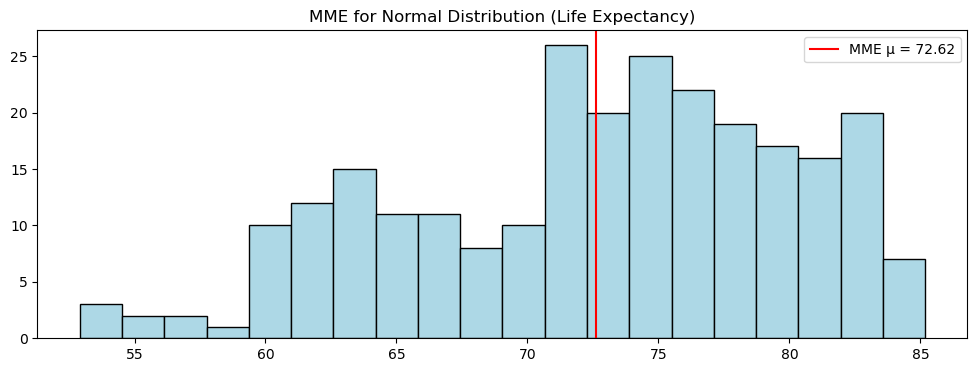

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.hist(life, bins=20, color="lightblue", edgecolor="black")
plt.axvline(mme_mu, color="red", label=f"MME μ = {mme_mu:.2f}")
plt.title("MME for Normal Distribution (Life Expectancy)")
plt.legend()
plt.show()


Method of Moments Estimation (MME) matches sample moments to theoretical moments.
- For Normal: μ̂ = sample mean, σ̂² = mean(X²) - mean(X)²
- For Bernoulli: p̂ = sample proportion
- For Exponential: λ̂ = 1 / sample mean
MME is easy to compute and always exists.
For the distributions we use (Normal, Bernoulli, Exponential), MME equals or closely matches MLE.
